In [18]:
from sympy import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# from scipy import integrate

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)

In [30]:
EE = symbols('E_E', constant=True)
EI = symbols('E_I', constant=True)
EL = symbols('E_L', constant=True)
theta = symbols('theta', constant=True)
tauE = symbols('tau_E', constant=True, positive=True)
tauI = symbols('tau_I', constant=True, positive=True)
tauL = symbols('tau_L', constant=True, positive=True)
tau = symbols('tau', constant=True, positive=True)
sigmaV = symbols('sigma_V', constant=True, positive=True)
nu = symbols('nu', constant=True, positive=True)
mu = symbols('mu', constant=True, positive=True)
sigmaE = symbols('sigma_E', constant=True, positive=True)
sigmaI = symbols('sigma_I', constant=True, positive=True)
V = symbols('V', positive=False)
wE = symbols('w_E', constant=True, positive=True)
wI = symbols('w_I', constant=True, positive=True)
KE = symbols('K_E', constant=True, positive=True)
KI = symbols('K_I', constant=True, positive=True)
nuE = symbols('nu_E', constant=True, positive=True)
alpha = symbols('alpha', constant=True, positive=True)
# W0 = Function('W_0')(V)
# dW0 = symbols('dW_0')
# WE = Function('W_E')(V)
# dWE = symbols('dW_E')

muE = wE*KE*nu*tauE
muI = wI*KI*nu*tauI
sigmaE = wE*sqrt(KE*nu*tauE)
sigmaI = wI*sqrt(KI*nu*tauI)
tau = tauL/(1 + muE + muI)
mu = (tau/tauL)*(EL + muE*EE + muI*EI)

# rho = Function('rho')(V)

hE = (sqrt(tauE)/tauL)*sigmaE*(EE-mu)
dhE = diff(hE, V)
hI = (sqrt(tauI)/tauL)*sigmaI*(EI-mu)
dhI = diff(hI, V)

W = -(V - mu)/tau
dW = diff(W, V)
SE = (1/2) * hE / (1 - tauE*(dW - (dhE / hE) * W))
SI = (1/2) * hI / (1 - tauI*(dW - (dhI / hI) * W))

dSE = diff(SE, V)
dSI = diff(SI, V)

Xi = ((hE*SE + hI*SI))

B = ((hE * dSE) + (hI * dSI) - W) / Xi
# GA = 2*tau/tauA**2 * integrate(simplify((V-mu)/(hA*FA)), V)
# GA = simplify(GA)
# simplify(LE)
# integrate(simplify(diff(FE, V)/FE), V)
# IE_i = (EE - V)**(-2*tauL**2/(sigmaE**2*tau*tauE))/FE*exp(-LE)
# IE_i
# B0 = simplify((V - mu)/(hE*SE + hI*SI))
# BE = simplify(hE*dSEdV/Xi)
# BI = simplify(hI*dSIdV/Xi)
# B = (S0 + hE*dSEdV + hI*dSIdV)/Xi
H = Heaviside(V - EL)/Xi
# integrate(B0, V)
# simplify(dSEdV)

# WI.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}).evalf()
# simplify(H.subs({V:-60, EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100})).evalf()
# SE.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}).evalf()
# B.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}).subs(V,-63).evalf()
B.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.5, tauI:10, EI:-80, wI:10, KI:100})
B_f = lambdify(V, B.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.5, tauI:10, EI:-80, wI:10, KI:100}))
B_f(-60)


1.9888504764699189

In [32]:
def integrate_p0(vec_Vk, B_f, H_f):
	"""Integrate the unnormalized probability distribution p0"""

	vec_p0_fliped = np.zeros_like(vec_Vk)
	dV = vec_Vk[1] - vec_Vk[0]
	vec_Vk_fliped = np.flip(vec_Vk)

	vec_p0_fliped[0] = 0

	for j, (Vk, p0) in enumerate(zip(vec_Vk_fliped[:-1], vec_p0_fliped[:-1])):
		Bk = B_f(Vk)
		Hk = H_f(Vk)
		if(-0.000001 <= Bk <= 0.000001):
			vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk
		else:
			vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk * (np.exp(dV*Bk) - 1) / (dV * Bk)

	vec_p0 = np.flip(vec_p0_fliped)

	return vec_p0

def calculate_firing_rate(vec_Vk, B_f, H_f) -> float:
		tauR_val = 2
		vec_p0 = integrate_p0(vec_Vk, B_f, H_f)
		dV = vec_Vk[1] - vec_Vk[0]

		return 1 / (tauR_val + dV * np.sum(vec_p0))

In [33]:
n = 30000
vec_Vk = np.linspace(-80, -50, n + 1)
vec_tauE = np.linspace(0.1, 100, 100)
vec_nu = np.zeros_like(vec_tauE)

for i, tauE_val in enumerate(vec_tauE):
	B_f = lambdify(V, B.subs({EE:0, EL:-60, tauL:20, tauE:tauE_val, KE:400, nu:0.005, wE:0.5, tauI:10, EI:-80, wI:10, KI:100}))
	H_f = lambdify(V, H.subs({EE:0, EL:-60, tauL:20, tauE:tauE_val, KE:400, nu:0.005, wE:0.5, tauI:10, EI:-80, wI:10, KI:100}))

	vec_nu[i] = calculate_firing_rate(vec_Vk, B_f, H_f)


/tmp/ipykernel_17797/306349451.py:16: RuntimeWarning: overflow encountered in double_scalars
  vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk * (np.exp(dV*Bk) - 1) / (dV * Bk)


In [19]:
fRate_data_path = "../../Data/fRate_data/"
V_data_path = "../../Data/V_data/"

df_nu_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_wI.dat", index_col=0)
df_mu_sim_read = pd.read_csv(f"{V_data_path}mean_V_ta_wI.dat", index_col=0)
df_sigma_V_sim_read = pd.read_csv(f"{V_data_path}var_V_ta_wI.dat", index_col=0)


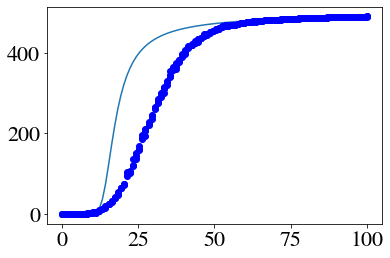

In [34]:
plt.plot(vec_tauE, vec_nu*1000)
plt.plot(df_nu_sim_read['tauA'], df_nu_sim_read['10'], 'bo')

<lambdifygenerated-57>:2: RuntimeWarning: divide by zero encountered in true_divide
  return Heaviside(V + 60, 1/2)/(0.00625*V**2/(20.0 - 10*(V + 55.0)/V) + 0.1*(-V - 80)**2/(30.0 + 20*(V + 55.0)/(-V - 80)))


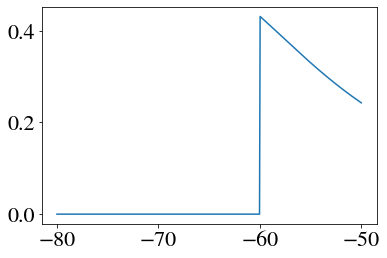

In [33]:
B_f = lambdify(V, B.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
dSE_f = lambdify(V, dSEdV.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
SE_f = lambdify(V, SE.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
hE_f = lambdify(V, hE.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
H_f = lambdify(V, H.subs({EE:0, EL:-60, theta:-50, tauL:20, tauE:5, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))

vec_x = np.linspace(-80, -50, 1000)
plt.plot(vec_x, H_f(vec_x))

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(19,12), dpi=100)
axs[0][0].set_title(r'$\tau_E=5ms$')
tauE_value = 5
f0 = lambdify(V, B0.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
fE = lambdify(V, BE.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
fI = lambdify(V, BI.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
f = lambdify(V, B.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
vec_x = np.linspace(-1000, -50, 1000)
axs[0][0].plot(vec_x, f0(vec_x), 'b-', label=r'$B_0$')
axs[0][0].plot(vec_x, fE(vec_x), 'r-', label=r'$B_E$')
axs[0][0].plot(vec_x, fI(vec_x), 'g-', label=r'$B_I$')
axs[0][1].plot(vec_x, f(vec_x), 'y', label=r'$B$')
axs[0][0].legend(bbox_to_anchor=(0.18, 0.986), loc=1, borderaxespad=0., prop={'size': 14})
axs[0][1].legend(bbox_to_anchor=(0.18, 0.986), loc=1, borderaxespad=0., prop={'size': 14})
axs[0][0].set_title(r'$\tau_E=5ms$')
tauE_value = 100
f0 = lambdify(V, B0.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
fE = lambdify(V, BE.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
fI = lambdify(V, BI.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
f = lambdify(V, B.subs({EE:0, EL:-60, tauL:20, tauE:tauE_value, KE:400, nu:0.005, wE:0.1, tauI:10, EI:-80, wI:0.4, KI:100}))
axs[1][0].plot(vec_x, f0(vec_x), 'b-', label=r'$B_0$')
axs[1][0].plot(vec_x, fE(vec_x), 'r-', label=r'$B_E$')
axs[1][0].plot(vec_x, fI(vec_x), 'g-', label=r'$B_I$')
axs[1][1].plot(vec_x, f(vec_x), 'y', label=r'$B$')
axs[1][0].legend(bbox_to_anchor=(0.18, 0.986), loc=1, borderaxespad=0., prop={'size': 14})
axs[1][1].legend(bbox_to_anchor=(0.18, 0.986), loc=1, borderaxespad=0., prop={'size': 14})
axs[1][0].set_title(r'$\tau_E=100ms$')

In [ ]:
x = symbols('x')
an = symbols('a_n', constant=True)
bn = symbols('b_n', constant=True)
cn = symbols('c_n', constant=True)
dn = symbols('d_n', constant=True)

ad = symbols('a_d', constant=True)
bd = symbols('b_d', constant=True)
cd = symbols('c_d', constant=True)
dd = symbols('d_d', constant=True)
ed = symbols('e_d', constant=True)

num_generic = poly(an*x + bn*x**2 + cn*x**3 + dn*x**4)
den_generic = poly(ad*x + bd*x**2 + cd*x**3 + dd*x**4 + ed*x**5)

expression = num_generic/den_generic

integrate(expression, x)


In [ ]:
IE_is = IE_i.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nuE:0.005, wE:0.4})

IE_if = lambdify(V, IE_is)
vec_x = np.linspace(-100, -50, 1000)
vec_IE = IE_if(vec_x)

plt.plot(vec_x, vec_IE)


In [ ]:
def IE(x):
    return integrate.quad(IE_if, -np.inf, x, limit=1000)[0]
IE = np.vectorize(IE)
integrand = ((EE - V)**(2*tauL**2/(sigmaE**2*tau*tauE))/hE*exp(LE)).subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nuE:0.005, wE:0.4})
ii = lambdify(V, integrand)
vec_ii = ii(vec_x)*IE(vec_x)

plt.plot(vec_x, vec_ii)
# integrand

In [ ]:
simplify((hE*FE).subs({V:mu}))

In [ ]:
integrand = simplify((EE - V)**(-tau/(sigmaE**2*tau**4))*exp(-LE)/FE)
integrands = simplify(integrand.subs({EE:0, EL:-60, tauL:20, tauE:5, KE:400, nuE:0.005, wE:0.4}))


# f = lambdify(V, integrands)
# data = np.linspace(-100, -50, 1000)
# plt.plot(data, f(data))
integrands

In [ ]:
x = symbols('x')
integrand = (V - mu)/(hE*FE*tau)
I = simplify(integrand)
I
simplify(integrate(I, V))

In [ ]:
# hA/(1 + (tauA/tau)*(1 - (dhAdV/hA)*(V-mu)))
hA
FAs

In [ ]:
FA = simplify(FA)
FAs = simplify(FA.subs({EE:0, EL:-60, tauL:20, tauA:5, KE:400, nuE:0.005, wE:0.4}))

f = lambdify(V, FAs)
data = np.linspace(-100, 100, 1000)
plt.plot(data, f(data))

In [42]:
x = symbols('x')
# FA = symbols('F_A')

exponent = (-tauL**2*(EE - mu)/(sigmaA**2*tau**2*tauA*(EE - V)) * (2*tau - tauA*(EE - 2*V + mu)/(EE-V)))
# exponent

coeff = ((EE - V)**(-2*tauL**2/(sigmaA**2*tau*tauA)))/FA
coeff

integrand = coeff*exp(exponent)
integrand = simplify(integrand)
# integrand

# integrand
# I = integrate(integrand, (V, -oo, x))
# collect(collect(collect(collect(factor(GA), log(-EE + V)), V), EE), mu)
# integrand.subs

In [ ]:
expr = integrand.subs({EE:0, EL:-60, tauL:20, tauA:5, KE:400, nuE:0.005, wE:0.4})
expr = simplify(expr)
f = lambdify(V, expr)
data = np.linspace(-60, -50, 1000)
# f(data)
plt.plot(data, f(data))
# expr

In [ ]:
C = (tauL*sqrt(tauA)/(sigmaA*tau**2))*(tau*(EE-V) + tauA*(EE-mu))/(V-EE)**(2*(1+tauL**2/(tauA*tau*sigmaA**2)))
exponential = exp(-tauL**2*(EE**2*(2 - tauA/tau) - 2*EE*mu - 2*V*(EE-mu)*(1 - tauA/tau) + mu**2*tauA/tau)/(sigmaA**2*tau*tauA*(EE-V)**2))

expr = simplify(C*exponential).subs({EE:0, EL:-60, tauL:20, tauA:5, KE:400, nuE:5, wE:0.1})
f = lambdify(V, expr)
data = np.linspace(-100, -50, 100)
# f(data)
expr

In [ ]:
tauA**2